# Q4.1

In [7]:
from sklearn import linear_model
from sklearn.preprocessing import minmax_scale
import pandas as pd
import numpy as np

In [8]:
data_BART_sld = pd.read_csv('data_X.csv').iloc[:48, 1:]

In [9]:
OD_BART = np.load('3d_daily.npy').sum(axis=2)[17, :48]

In [10]:
def get_w(alpha):
    X = minmax_scale(data_BART_sld)
    y = minmax_scale(OD_BART)

    reg = linear_model.ElasticNet(alpha=alpha)
    reg.fit(X, y)

    return reg.intercept_, *reg.coef_[:4]

In [20]:
import warnings
warnings.filterwarnings('ignore')

cols = ['Intercept', 'Coef for TotPop', 'Coef for AutoOwn0', 'Coef for TotEmp', 'coeCoef for Tot Rd Dens']
w = [[] for _ in cols]

alpha_set = np.arange(0, 1.0, 0.05)
for alpha in alpha_set:
    for t,l in zip(get_w(alpha), w):
       l.append(t) 



Text(0, 0.5, 'coeficient')

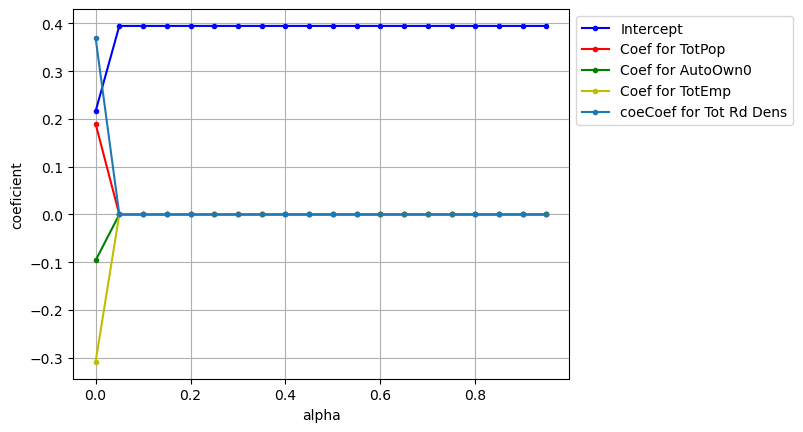

In [21]:
import matplotlib.pyplot as plt

style = ['b.-', 'r.-', 'g.-', 'y.-', '.-']
for i, d in enumerate(w):
    plt.plot(alpha_set, d, style[i], label=cols[i])
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('alpha')
plt.ylabel('coeficient')    


# Q4.2
No, as shown in the example, the coefficient all reduce to 0 if we apply a strong regularization, render the model to only gives out constant as regression result.